In [1]:
import pandas as pd
import numpy as np

# matplotlib
import matplotlib.pyplot as plt

# sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# seaborn
import seaborn as sns


df = pd.read_csv('InflationRates.csv', delimiter=';')

df['Bulgaria'] = df['Bulgaria'].str.replace(',', '').astype(float)

In [2]:
df.head()

,Year,Bulgaria,EU,USA,World
0,2022,15.33,8.83,8.00,8.27
1,2021,3.30,2.55,4.70,3.48
2,2020,1.67,0.48,1.23,1.93
3,2019,3.10,1.63,1.81,2.21
4,2018,2.81,1.74,2.44,2.44


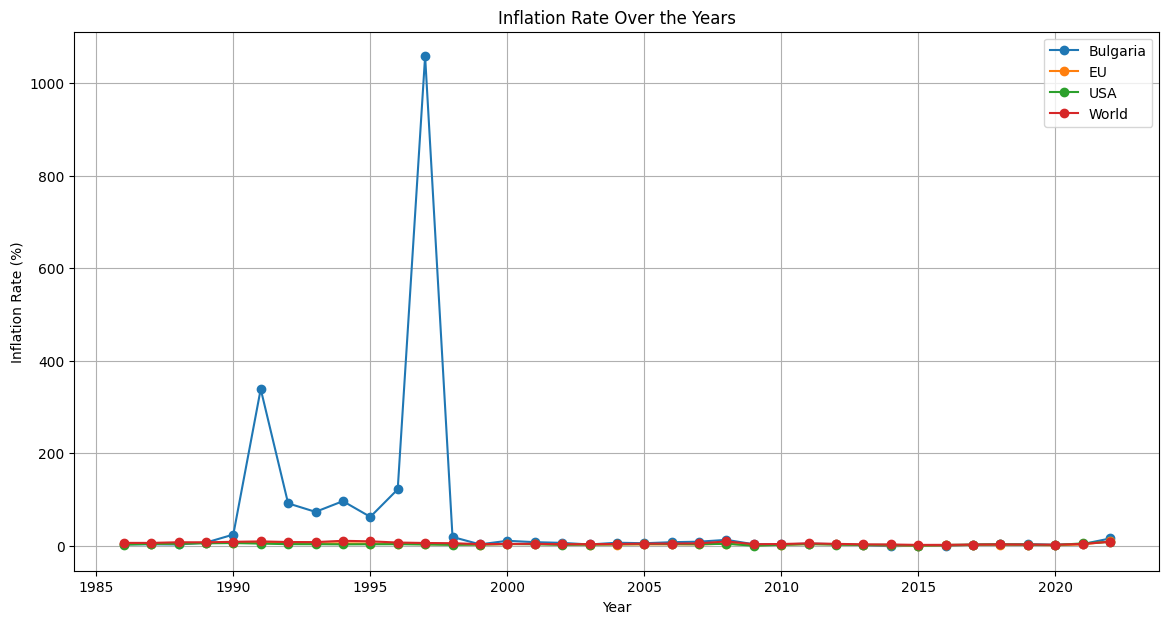

In [3]:
plt.figure(figsize=(14, 7))
plt.plot(df['Year'], df['Bulgaria'], label='Bulgaria', marker='o')
plt.plot(df['Year'], df['EU'], label='EU', marker='o')
plt.plot(df['Year'], df['USA'], label='USA', marker='o')
plt.plot(df['Year'], df['World'], label='World', marker='o')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('Inflation Rate Over the Years')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
df.describe()


,Year,Bulgaria,EU,USA,World
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,2004.000000,54.167297,3.061351,2.752703,4.862162
std,10.824355,180.237767,1.945094,1.503964,2.488610
min,1986.000000,-1.420000,-0.060000,-0.360000,1.430000
25%,1995.000000,2.570000,1.740000,1.810000,2.940000
50%,2004.000000,5.040000,2.660000,2.680000,4.110000
75%,2013.000000,15.330000,4.160000,3.380000,7.000000
max,2022.000000,1058.370000,8.830000,8.000000,10.320000


> СТАТИСТИЧЕСКО ОБОБЩЕНИЕ НА ДАННИТЕ
***
Наборът от данни обхваща периода от 1986 г. до 2022 г. 

- България
    - Средният темп на инфлация за България е приблизително 54,17%
    - Стандартното отклонение е приблизително 180,24%
    - Минималният темп на инфлация е -1,42%
    - Максималният темп на инфлация 1058,37%
     
- ЕС
    - Средният темп на инфлация за ЕС е приблизително 3,06%
    - Минималният темп на инфлация -0,06%
    - Максималният темп на инфлация 8,83%

- САЩ
    - Средният темп на инфлация за ЕС е приблизително 2,75%
    - Минималният темп на инфлация -0.36%
    - Максималният темп на инфлация 8%
    

`Високата нестабилност може да означава икономическа нестабилност или промяна на икономическата политика`

In [5]:
correlation_matrix = df[['Bulgaria', 'EU', 'USA', 'World']].corr()
print(correlation_matrix)

          Bulgaria        EU       USA     World
Bulgaria  1.000000  0.138082  0.026563  0.229735
EU        0.138082  1.000000  0.837174  0.858520
USA       0.026563  0.837174  1.000000  0.612667
World     0.229735  0.858520  0.612667  1.000000


## Корелационен анализ

### Корелация на България:

- **България и ЕС**: Корелацията e `0,138082` показва много слаба положителна връзка между нивата на инфлация в България и ЕС.
- **България и САЩ**: Корелацията e `0,026563`, което показва, че почти няма линейна връзка между темповете на инфлация в България и САЩ.
- **България и световната инфлация**: Корелацията e `0,229735` показва слаба положителна връзка между темповете на инфлация в България и средните за света.

### Корелация между ЕС - САЩ/Света и САЩ и Света:

- **ЕС и САЩ**: Корелация e `0,837174` показва силна положителна връзка между нивата на инфлация в ЕС и САЩ.
- **ЕС и света**: Корелация e `0,858520` показва силна положителна връзка между темповете на инфлация в ЕС и средното за света равнище.
- **САЩ и света**: Корелация e `0,612667` показва умерена положителна връзка между темповете на инфлация в САЩ и средното за света равнище.


Равнищата на инфлация в ЕС, САЩ и света са умерено до силно корелирани помежду си.

#EU

## Линейната регресия за България и ЕС

In [6]:
X_EU = df[['EU']]
y_BG = df['Bulgaria']
X_train, X_test, y_train, y_test = train_test_split(X_EU, y_BG, test_size=0.2, random_state=42)

# обучаваме модела
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# предсказваме инфлацията 
#  y_pred, е списък на прогнозираните темпове на инфлация за България въз основа 
# на съответните темпове на инфлация в ЕС в X_test.
y_pred = regressor.predict(X_test)

# зичисляваме RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [7]:
# За всеки темп на инфлация на ЕС в набора X_test регресорният модел 
# ще предостави съответния прогнозен темп на инфлация за България.
print(f"Bulgaria vs EU - R^2: {r2}")
print(f"Bulgaria vs EU - RMSE: {rmse}")
print(f"Intercept for Bulgaria vs EU: {regressor.intercept_}")
print(f"Coefficient for EU: {regressor.coef_[0]}")

Bulgaria vs EU - R^2: -0.1480993000522628
Bulgaria vs EU - RMSE: 367.3179538313457
Intercept for Bulgaria vs EU: -13.371881767322837
Coefficient for EU: 12.181926592261703


R^2(0-1) - моделът не е подходящ за данните
<br>
RMSE - показва значителни грешки в прогнозите
<br>
Intercept(Пресечна точка) - стойноста `-13.37..` не е реалистично или смислено тълкуване

Заключение: Линейният регресионен модел за България спрямо ЕС не изглежда ефективен модел 

# Random Forest Model за България и ЕС

In [8]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees in the forest

rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)


print(f"Bulgaria vs EU - R^2: {r2}")
print(f"Bulgaria vs EU - RMSE: {rmse}")

Bulgaria vs EU - R^2: -0.1480993000522628
Bulgaria vs EU - RMSE: 367.3179538313457


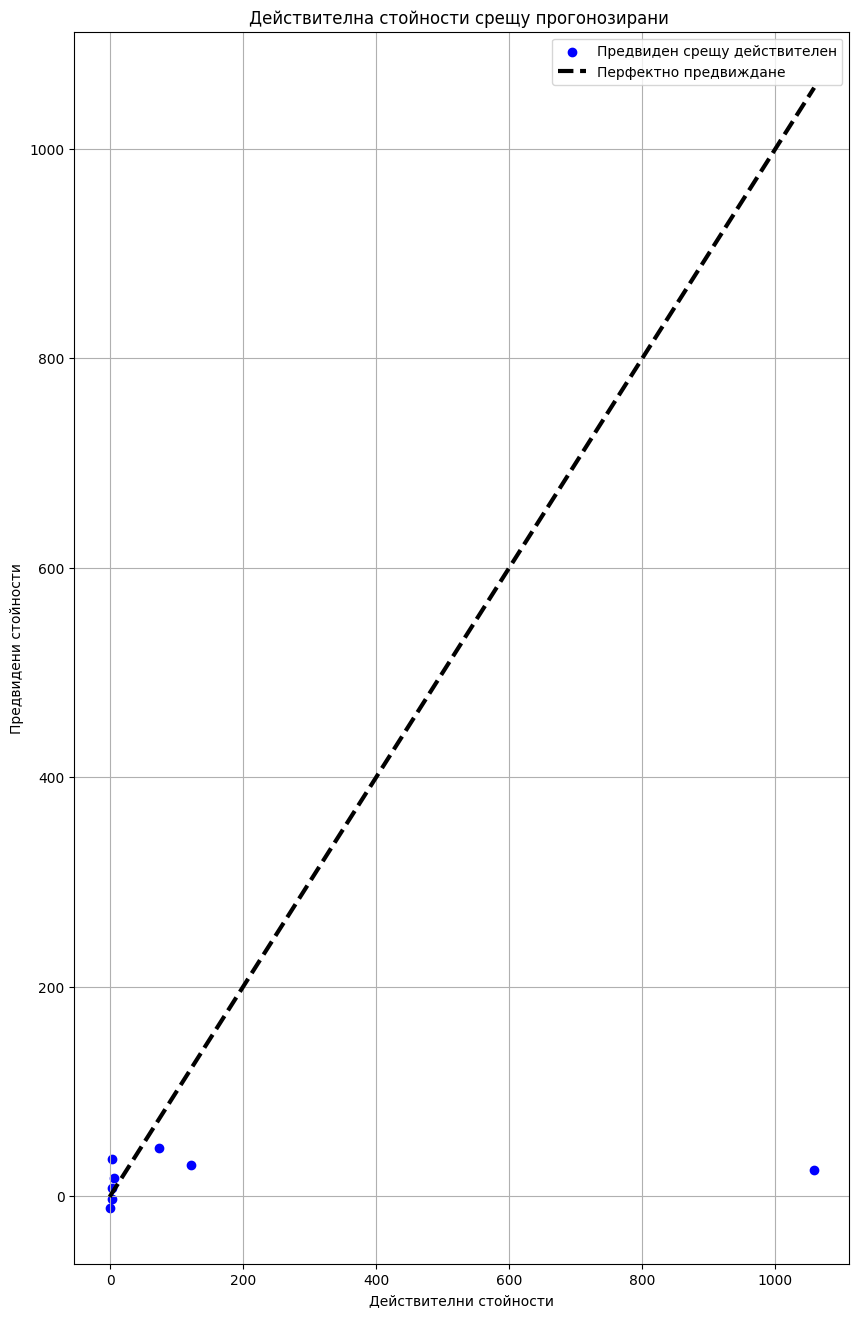

In [10]:
plt.figure(figsize=(10, 16))
plt.scatter(y_test, y_pred, color='blue', label='Предвиден срещу действителен')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Перфектно предвиждане')
plt.xlabel('Действителни стойности')
plt.ylabel('Предвидени стойности')
plt.title('Действителна стойности срещу прогонозирани ')
plt.legend()
plt.grid(True)
plt.show()

## Линейната регресия за България и ЕС 2, със стойности след 2000г.

In [11]:
df_filtered = df[df['Year'] >= 2000]

X = df_filtered[['EU']]
y = df_filtered['Bulgaria']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Bulgaria vs EU - R^2: {r2}")
print(f"Bulgaria vs EU - RMSES: {rmse}")
print(f"Intercept for Bulgaria vs EU: {regressor.intercept_}")
print(f"Coefficient for EU: {regressor.coef_[0]}")

Bulgaria vs EU - R^2: 0.7362909587182481
Bulgaria vs EU - RMSES: 3.0318006064344747
Intercept for Bulgaria vs EU: -0.8141522359602149
Coefficient for EU: 2.4891471786733628


R^2 -  73,63% от променливостта на темпа на инфлация в България може да бъде обяснена с променливостта на темпа на инфлация в ЕС. Силна индикация за линейна зависимост.

Коефициент за ЕС - Стойността на коефициента от 2,48 означава, че за всеки 1% увеличение в ЕС, в България ще се вдигне с 2,48%

In [12]:
df_filtered = df[df['Year'] > 2000]

X = df_filtered[['EU', 'USA', 'World']]
y = df_filtered['Bulgaria']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'Bulgaria vs [EU, USA, World] - R^2: {r2}')
print(f'Bulgaria vs [EU, USA, World] - RMSE: {rmse}')



Bulgaria vs [EU, USA, World] - R^2: 0.6235128808060653
Bulgaria vs [EU, USA, World] - RMSE: 3.526700927779384


In [13]:
importances = forest.feature_importances_
print(f'Importance of EU: {importances[0]}')
print(f'Importance of USA: {importances[1]}')
print(f'Importance of World: {importances[2]}')

Importance of EU: 0.5209407655427656
Importance of USA: 0.35663799483644665
Importance of World: 0.12242123962078781


### Анализ на модела Random Forest за инфлацията в България (данни след 2000 г.):


#### 1. Коефициент на детерминация (R^2):
- **Стойност**: 0.6235
- **Интерпретация**: Това показва, че около 62,35% от променливостта на темпа на инфлация в България се обяснява с темповете на инфлация в ЕС, САЩ и света. Като се имат предвид тънкостите на икономическата динамика.

#### 2. Средна квадратична грешка (RMSE):
- **Стойност**: 3.5267%
- **Интерпретация**: Прогнозите на модела се отклоняват средно с около 3,53 процентни пункта при прогнозиране на инфлацията в България.

#### 3. Внос на характеристики:
- **ЕС**: Със значимост от приблизително 52,09% инфлацията в ЕС се откроява като най-значимия прогностичен фактор за инфлацията в България.
- **САЩ**: Със значимост от 35,66% инфлацията в САЩ също оказва значително влияние върху инфлацията в България.
- **Свят**: С по-умерено влияние от 12,24% световният темп на инфлация все още играе роля.


#### Ключови изводи:
Random Forest превъзхожда линейната регресия, още повече при фокусираната съвкупност от данни (след 2000 г.). Забележително е, че темповете на инфлация в ЕС и САЩ се очертават като доминиращи фактори, влияещи върху инфлацията в България, като ЕС има водеща роля.

### Using KNN for Regression:


In [14]:
ro_data = pd.read_csv('RomaniaInflationRates.csv', delimiter=';')
gr_data = pd.read_csv('GreeceInflationRates.csv', delimiter=';')

bg_data = df[['Year', 'Bulgaria']]

In [15]:
ro_data.head()

,Year,Romania
0,2022,13.80
1,2021,5.05
2,2020,2.63
3,2019,3.83
4,2018,4.63


In [16]:
gr_data.head()

,Year,Greece
0,2022,9.65
1,2021,1.22
2,2020,-1.25
3,2019,0.25
4,2018,0.63


In [17]:
bg_data.head()

,Year,Bulgaria
0,2022,15.33
1,2021,3.30
2,2020,1.67
3,2019,3.10
4,2018,2.81


In [18]:
bg_data = bg_data[bg_data['Year'] >= 2000]
ro_data = ro_data[ro_data['Year'] >= 2000]
gr_data = gr_data[gr_data['Year'] >= 2000]

In [19]:
merged_data = pd.merge(bg_data, ro_data, on='Year', how='inner')
merged_data = pd.merge(merged_data, gr_data, on='Year', how='inner')

In [20]:
X = merged_data[['Romania', 'Greece']]
y = merged_data['Bulgaria']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [23]:
for col in ['Bulgaria', 'Romania', 'Greece']:
    merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

merged_data.dropna(inplace=True)

print(merged_data[merged_data.isna().any(axis=1)])


Empty DataFrame
Columns: [Year, Bulgaria, Romania, Greece]
Index: []


In [24]:

# Split the data
X = merged_data[['Romania', 'Greece']]
y = merged_data['Bulgaria']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use KNN
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predict
y_pred = knn.predict(X_test_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 22.097831111111113
R^2 Score: 0.36602315111592276


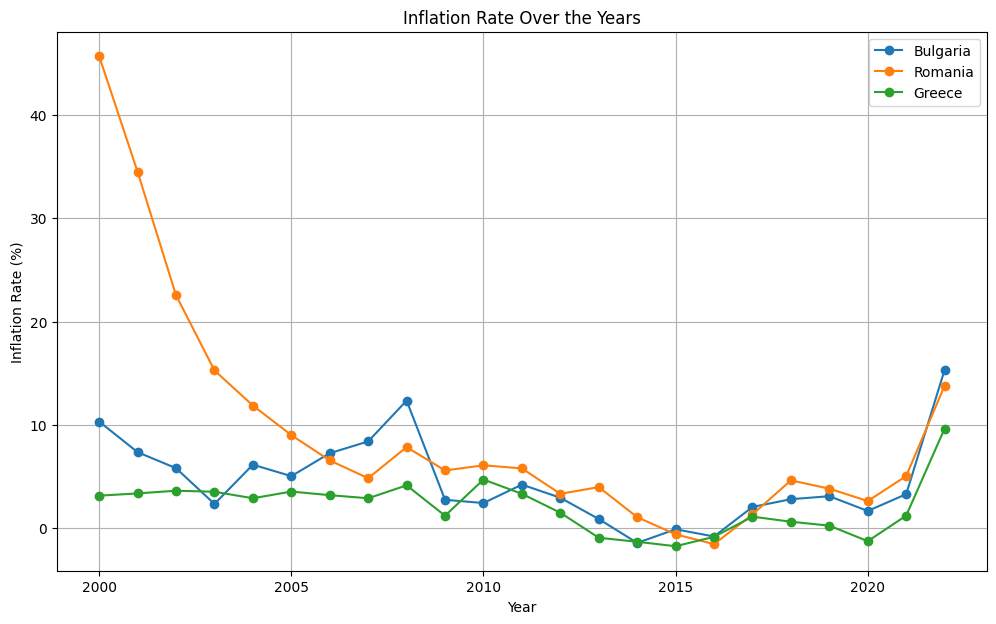

In [25]:
plt.figure(figsize=(12, 7))

plt.plot(merged_data['Year'], merged_data['Bulgaria'], label='Bulgaria', marker='o')
plt.plot(merged_data['Year'], merged_data['Romania'], label='Romania', marker='o')
plt.plot(merged_data['Year'], merged_data['Greece'], label='Greece', marker='o')

plt.title('Inflation Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


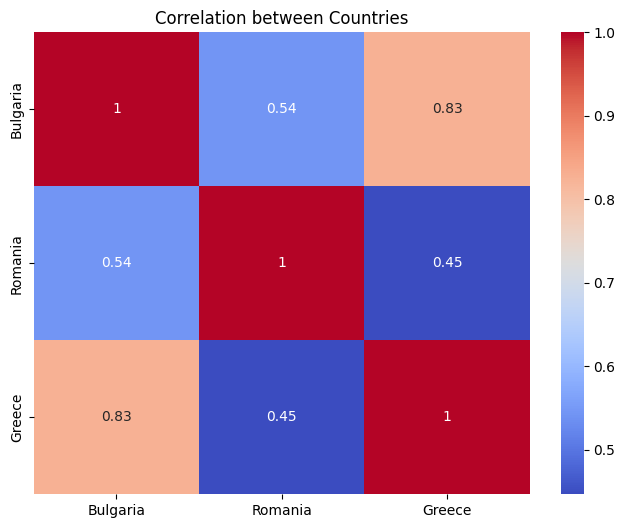

In [26]:
corr_matrix = merged_data[['Bulgaria', 'Romania', 'Greece']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Countries')
plt.show()

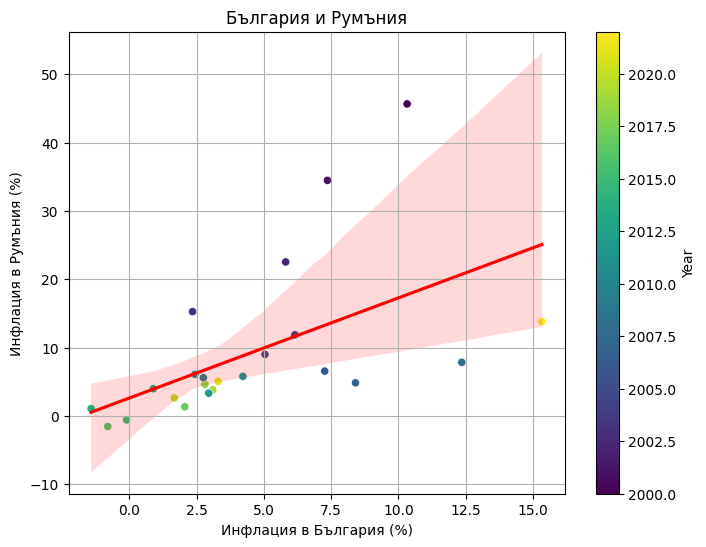

In [27]:
plt.figure(figsize=(8, 6))

plt.scatter(merged_data['Bulgaria'], merged_data['Romania'], c=merged_data['Year'], cmap='viridis', edgecolors='w', linewidths=0.5)

sns.regplot(x=merged_data['Bulgaria'], y=merged_data['Romania'], scatter=False, line_kws={"color": "red"})

cbar = plt.colorbar()
cbar.set_label('Year')

plt.title('България и Румъния')
plt.xlabel('Инфлация в България (%)')
plt.ylabel('Инфлация в Румъния (%)')
plt.grid(True)
plt.show()


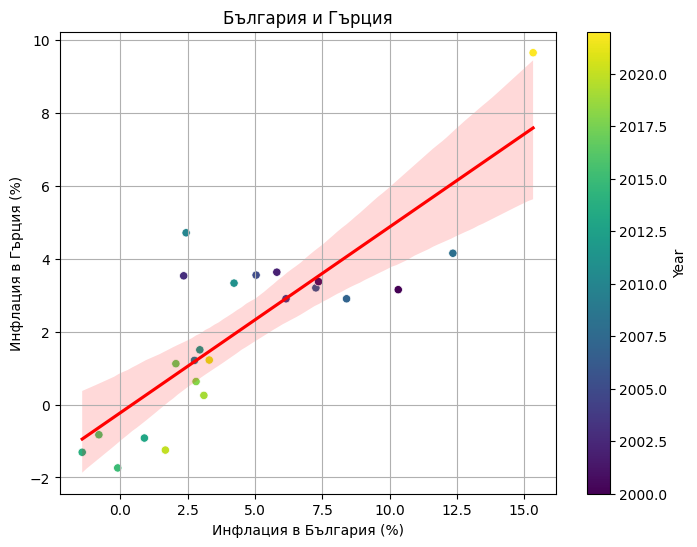

In [28]:
plt.figure(figsize=(8, 6))

plt.scatter(merged_data['Bulgaria'], merged_data['Greece'], c=merged_data['Year'], cmap='viridis', edgecolors='w', linewidths=0.5)

sns.regplot(x=merged_data['Bulgaria'], y=merged_data['Greece'], scatter=False, line_kws={"color": "red"})

cbar = plt.colorbar()
cbar.set_label('Year')

plt.title('България и Гърция')
plt.xlabel('Инфлация в България (%)')
plt.ylabel('Инфлация в Гърция (%)')
plt.grid(True)
plt.show()
